In [1]:
import pandas as pd

In [2]:
INPUT_FILE = '../data/histogram.csv'
COLUMNS_FILE = '../data/columns.csv'

In [3]:
def get_columns():
    fin = open(COLUMNS_FILE, 'r')
    col_data = fin.read()
    fin.close()
    columns_tmp = col_data.split(',')
    
    columns = []
    blank_counter = 0
    for col in columns_tmp:
        col_name = col
        if col == '-':
            blank_counter += 1
            col_name = 'blank_' + str(blank_counter)
        columns.append(col_name)
    return columns

def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) + "%" if pct > 1 else ''

In [4]:
columns = get_columns()

In [5]:
df = pd.read_csv(INPUT_FILE, names=columns)

In [6]:
# Drop empty columns
for i in range (1, 115):
    df = df.drop('blank_' + str(i), 1)

In [7]:
columns = [col for col in columns if col[:6] != 'blank_']
opcodes = columns[2:-1]

In [8]:
ordered_df = df[opcodes].sum().sort_values()

In [9]:
ordered_df

CALLCODE              16
EXTCODECOPY           35
LOG0                 254
PUSH27              5903
PUSH18              7184
                 ...    
SWAP1          323419858
JUMPDEST       361548394
POP            406005141
PUSH2          488778795
PUSH1          743520755
Length: 142, dtype: int64

In [10]:
ordered_columns = list(ordered_df.keys())
ordered_columns.reverse()
print(ordered_columns)

['PUSH1', 'PUSH2', 'POP', 'JUMPDEST', 'SWAP1', 'DUP2', 'DUP1', 'ADD', 'JUMPI', 'ISZERO', 'DUP3', 'MSTORE', 'JUMP', 'AND', 'SWAP2', 'MLOAD', 'DUP4', 'PUSH4', 'EQ', 'SWAP3', 'SUB', 'DUP5', 'LT', 'PUSH20', 'SLOAD', 'DIV', 'DUP6', 'GT', 'MUL', 'CALLDATALOAD', 'KECCAK256', 'SHL', 'SWAP4', 'EXP', 'DUP7', 'PUSH32', 'SSTORE', 'CALLDATASIZE', 'DUP8', 'SWAP5', 'DUP9', 'NOT', 'CALLER', 'CALLVALUE', 'OR', 'RETURNDATASIZE', 'SWAP6', 'SHR', 'GAS', 'RETURN', 'DUP10', 'PUSH29', 'EXTCODESIZE', 'PUSH14', 'DUP11', 'CALL', 'DUP12', 'SWAP7', 'LOG3', 'PUSH3', 'DUP13', 'SWAP9', 'SWAP8', 'PUSH8', 'SWAP10', 'CALLDATACOPY', 'STOP', 'SLT', 'STATICCALL', 'DUP14', 'PUSH28', 'PUSH5', 'ADDRESS', 'DUP15', 'DUP16', 'RETURNDATACOPY', 'PUSH15', 'SIGNEXTEND', 'TIMESTAMP', 'PUSH16', 'SWAP11', 'MULMOD', 'BYTE', 'CODECOPY', 'MSTORE8', 'DELEGATECALL', 'PUSH12', 'ADDMOD', 'MOD', 'SGT', 'LOG1', 'PUSH13', 'LOG2', 'NUMBER', 'PUSH31', 'PUSH21', 'PUSH7', 'SWAP12', 'LOG4', 'PUSH17', 'SWAP13', 'PUSH9', 'SELFBALANCE', 'PUSH10', 'REVE

In [11]:
ordered_columns

['PUSH1',
 'PUSH2',
 'POP',
 'JUMPDEST',
 'SWAP1',
 'DUP2',
 'DUP1',
 'ADD',
 'JUMPI',
 'ISZERO',
 'DUP3',
 'MSTORE',
 'JUMP',
 'AND',
 'SWAP2',
 'MLOAD',
 'DUP4',
 'PUSH4',
 'EQ',
 'SWAP3',
 'SUB',
 'DUP5',
 'LT',
 'PUSH20',
 'SLOAD',
 'DIV',
 'DUP6',
 'GT',
 'MUL',
 'CALLDATALOAD',
 'KECCAK256',
 'SHL',
 'SWAP4',
 'EXP',
 'DUP7',
 'PUSH32',
 'SSTORE',
 'CALLDATASIZE',
 'DUP8',
 'SWAP5',
 'DUP9',
 'NOT',
 'CALLER',
 'CALLVALUE',
 'OR',
 'RETURNDATASIZE',
 'SWAP6',
 'SHR',
 'GAS',
 'RETURN',
 'DUP10',
 'PUSH29',
 'EXTCODESIZE',
 'PUSH14',
 'DUP11',
 'CALL',
 'DUP12',
 'SWAP7',
 'LOG3',
 'PUSH3',
 'DUP13',
 'SWAP9',
 'SWAP8',
 'PUSH8',
 'SWAP10',
 'CALLDATACOPY',
 'STOP',
 'SLT',
 'STATICCALL',
 'DUP14',
 'PUSH28',
 'PUSH5',
 'ADDRESS',
 'DUP15',
 'DUP16',
 'RETURNDATACOPY',
 'PUSH15',
 'SIGNEXTEND',
 'TIMESTAMP',
 'PUSH16',
 'SWAP11',
 'MULMOD',
 'BYTE',
 'CODECOPY',
 'MSTORE8',
 'DELEGATECALL',
 'PUSH12',
 'ADDMOD',
 'MOD',
 'SGT',
 'LOG1',
 'PUSH13',
 'LOG2',
 'NUMBER',
 'PUSH31',
 '

<AxesSubplot:ylabel='None'>

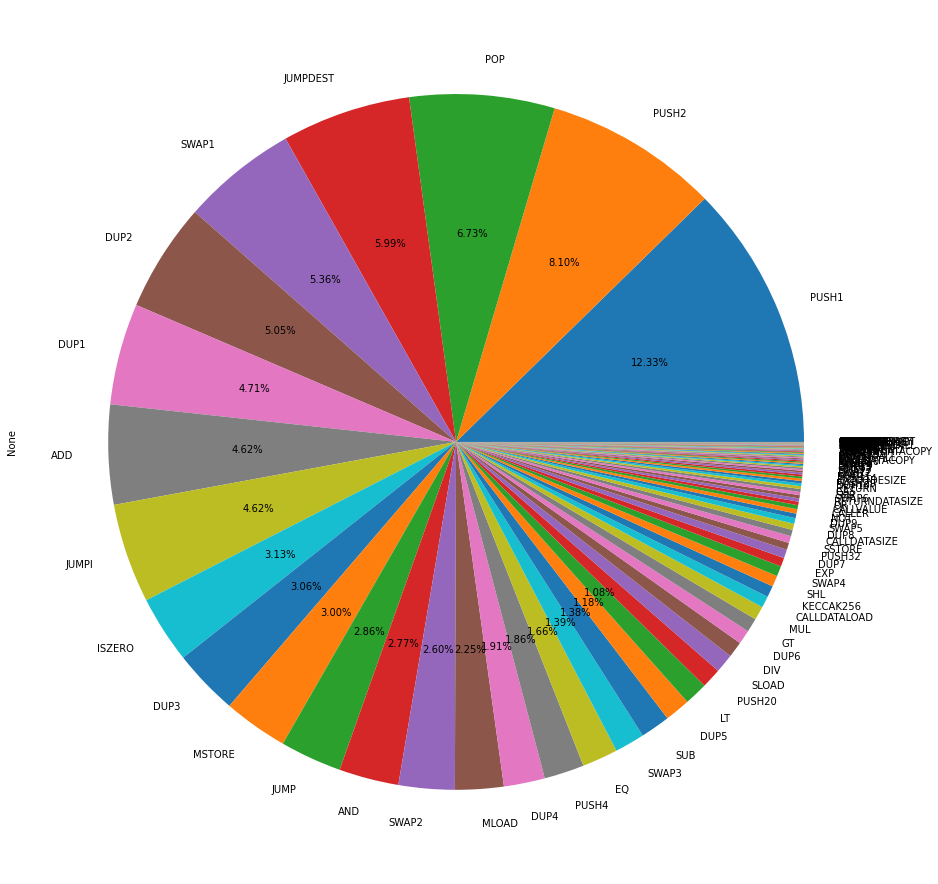

In [12]:
df[ordered_columns].sum().plot(kind='pie', figsize=(16,16), autopct=autopct)

In [13]:
major_ops = ['PUSH1', 'PUSH2', 'POP', 'JUMPDEST', 'SWAP1', 'DUP2', 'DUP1', 'ADD', 'JUMPI', 'ISZERO', 'DUP3', 'MSTORE', 'JUMP', 'AND', 'SWAP2', 'MLOAD', 'DUP4', 'PUSH4', 'EQ', 'SWAP3', 'SUB', 'DUP5', 'LT', 'PUSH20', 'SLOAD', 'DIV', 'DUP6', 'GT', 'MUL', 'CALLDATALOAD', 'KECCAK256', 'SHL', 'SWAP4', 'EXP', 'DUP7', 'PUSH32', 'SSTORE', 'CALLDATASIZE']

arith_ops = ['ADDMOD', 'MOD', 'MULMOD', 'NOT', 'OR', 'SAR', 'SDIV', 'SGT', 'SHR', 'SIGNEXTEND', 'SLT', 'SMOD', 'XOR']
env_ops = ['ADDRESS', 'BALANCE', 'BLOCKHASH', 'BYTE', 'CHAINID', 'COINBASE', 'DIFFICULTY', 'GAS', 'GASLIMIT', 'GASPRICE', 'INVALID', 'NUMBER', 'ORIGIN', 'PC', 'RETURN', 'REVERT', 'SELFBALANCE', 'SELFDESTRUCT', 'TIMESTAMP', 'STOP']
call_ops = ['CALL', 'CALLCODE', 'CALLDATACOPY', 'CALLER', 'CALLVALUE', 'DELEGATECALL', 'STATICCALL']
code_ops = ['CODECOPY', 'CODESIZE']
create_ops = ['CREATE', 'CREATE2']
dup_ops = ['DUP10', 'DUP11', 'DUP12', 'DUP13', 'DUP14', 'DUP15', 'DUP16', 'DUP8', 'DUP9']
extcode_ops = ['EXTCODECOPY', 'EXTCODEHASH', 'EXTCODESIZE']
log_ops = ['LOG0', 'LOG1', 'LOG2', 'LOG3', 'LOG4']
mem_ops = ['MSIZE', 'MSTORE8']
push_ops = [ 'PUSH10', 'PUSH11', 'PUSH12', 'PUSH13', 'PUSH14', 'PUSH15', 'PUSH16', 'PUSH17', 'PUSH18', 'PUSH19', 'PUSH21', 'PUSH22', 'PUSH23', 'PUSH24', 'PUSH25', 'PUSH26', 'PUSH27', 'PUSH28', 'PUSH29', 'PUSH3', 'PUSH30', 'PUSH31', 'PUSH5', 'PUSH6', 'PUSH7', 'PUSH8', 'PUSH9']
return_ops = ['RETURN', 'RETURNDATACOPY', 'RETURNDATASIZE']
swap_ops = [ 'SWAP10', 'SWAP11', 'SWAP12', 'SWAP13', 'SWAP14', 'SWAP15', 'SWAP16', 'SWAP5', 'SWAP6', 'SWAP7', 'SWAP8', 'SWAP9']

In [14]:
df['ARITH_OPS'] = df['ADDMOD'] + df['MOD'] + df['MULMOD'] + df['NOT'] + df['OR'] + df['SAR'] + df['SDIV'] + df['SGT'] + df['SHR'] + df['SIGNEXTEND'] + df['SLT'] + df['SMOD'] + df['XOR']
df['ENV_OPS'] = df['ADDRESS'] + df['BALANCE'] + df['BLOCKHASH'] + df['BYTE'] + df['CHAINID'] + df['COINBASE'] + df['DIFFICULTY'] + df['GAS'] + df['GASLIMIT'] + df['GASPRICE'] + df['INVALID'] + df['NUMBER'] + df['ORIGIN'] + df['PC'] + df['RETURN'] + df['REVERT'] + df['SELFBALANCE'] + df['SELFDESTRUCT'] + df['TIMESTAMP'] + df['STOP']
df['CALL_OPS'] = df['CALL'] + df['CALLCODE'] + df['CALLDATACOPY'] + df['CALLER'] + df['CALLVALUE'] + df['DELEGATECALL'] + df['STATICCALL']
df['CODE_OPS'] = df['CODECOPY'] + df['CODESIZE']
df['CREATE_OPS'] = df['CREATE'] + df['CREATE2']
df['DUP_OPS'] = df['DUP10'] + df['DUP11'] + df['DUP12'] + df['DUP13'] + df['DUP14'] + df['DUP15'] + df['DUP16'] + df['DUP8'] + df['DUP9']
df['EXTCODE_OPS'] = df['EXTCODECOPY'] + df['EXTCODEHASH'] + df['EXTCODESIZE']
df['LOG_OPS'] = df['LOG0'] + df['LOG1'] + df['LOG2'] + df['LOG3'] + df['LOG4']
df['MEM_OPS'] = df['MSIZE'] + df['MSTORE8']
df['PUSH_OPS'] = df['PUSH10'] + df['PUSH11'] + df['PUSH12'] + df['PUSH13'] + df['PUSH14'] + df['PUSH15'] + df['PUSH16'] + df['PUSH17'] + df['PUSH18'] + df['PUSH19'] + df['PUSH21'] + df['PUSH22'] + df['PUSH23'] + df['PUSH24'] + df['PUSH25'] + df['PUSH26'] + df['PUSH27'] + df['PUSH28'] + df['PUSH29'] + df['PUSH3'] + df['PUSH30'] + df['PUSH31'] + df['PUSH5'] + df['PUSH6'] + df['PUSH7'] + df['PUSH8'] + df['PUSH9']
df['RETURN_OPS'] = df['RETURN'] + df['RETURNDATACOPY'] + df['RETURNDATASIZE']
df['SWAP_OPS'] = df['SWAP10'] + df['SWAP11'] + df['SWAP12'] + df['SWAP13'] + df['SWAP14'] + df['SWAP15'] + df['SWAP16'] + df['SWAP5'] + df['SWAP6'] + df['SWAP7'] + df['SWAP8'] + df['SWAP9']

# Group the least used opcodes together
df['OTHER_OPS'] = df['EXTCODE_OPS'] + df['LOG_OPS'] + df['CODE_OPS'] + df['MEM_OPS'] + df['CREATE_OPS']

In [15]:
condensed_ops = major_ops + ['ARITH_OPS', 'ENV_OPS', 'CALL_OPS', 'DUP_OPS', 'PUSH_OPS', 'RETURN_OPS', 'SWAP_OPS', 'OTHER_OPS']
ordered_df = df[condensed_ops].sum().sort_values()
ordered_condensed = list(ordered_df.keys())
ordered_condensed.reverse()
ordered_condensed

['PUSH1',
 'PUSH2',
 'POP',
 'JUMPDEST',
 'SWAP1',
 'DUP2',
 'DUP1',
 'ADD',
 'JUMPI',
 'ISZERO',
 'DUP3',
 'MSTORE',
 'JUMP',
 'AND',
 'SWAP2',
 'MLOAD',
 'DUP4',
 'PUSH4',
 'EQ',
 'SWAP3',
 'SUB',
 'DUP5',
 'LT',
 'DUP_OPS',
 'PUSH20',
 'SLOAD',
 'DIV',
 'SWAP_OPS',
 'DUP6',
 'GT',
 'MUL',
 'ARITH_OPS',
 'CALLDATALOAD',
 'CALL_OPS',
 'KECCAK256',
 'SHL',
 'PUSH_OPS',
 'SWAP4',
 'ENV_OPS',
 'EXP',
 'DUP7',
 'PUSH32',
 'SSTORE',
 'RETURN_OPS',
 'CALLDATASIZE',
 'OTHER_OPS']

<AxesSubplot:ylabel='None'>

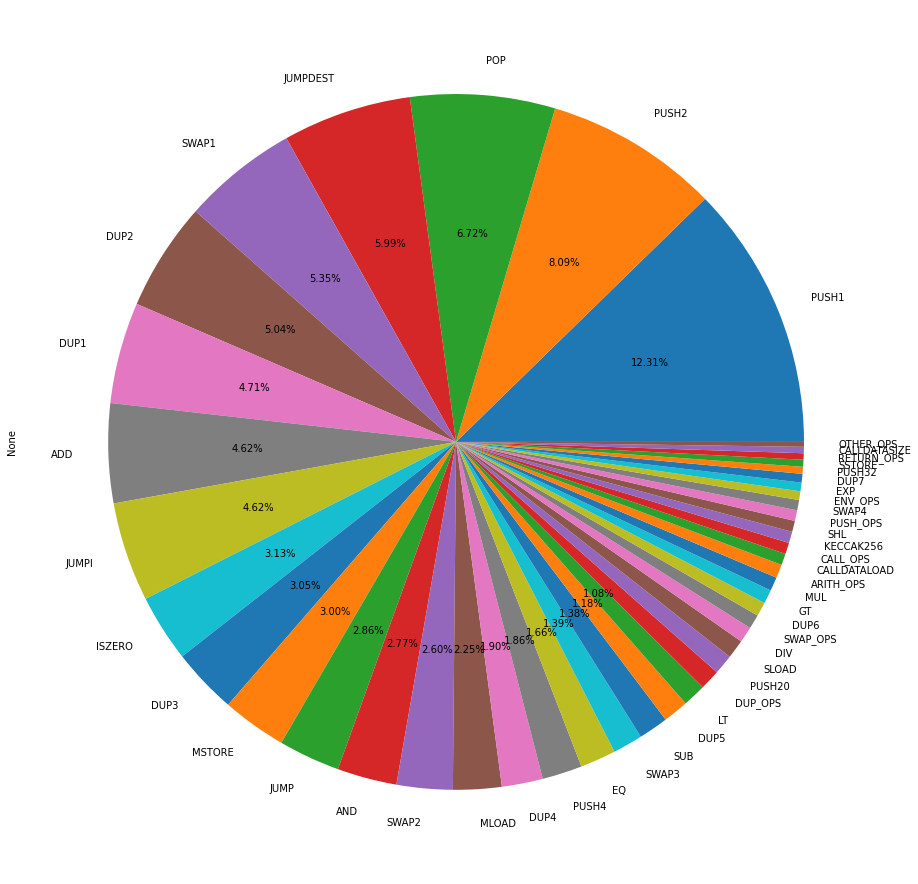

In [16]:
df[ordered_condensed].sum().plot(kind='pie', figsize=(16,16), autopct=autopct)

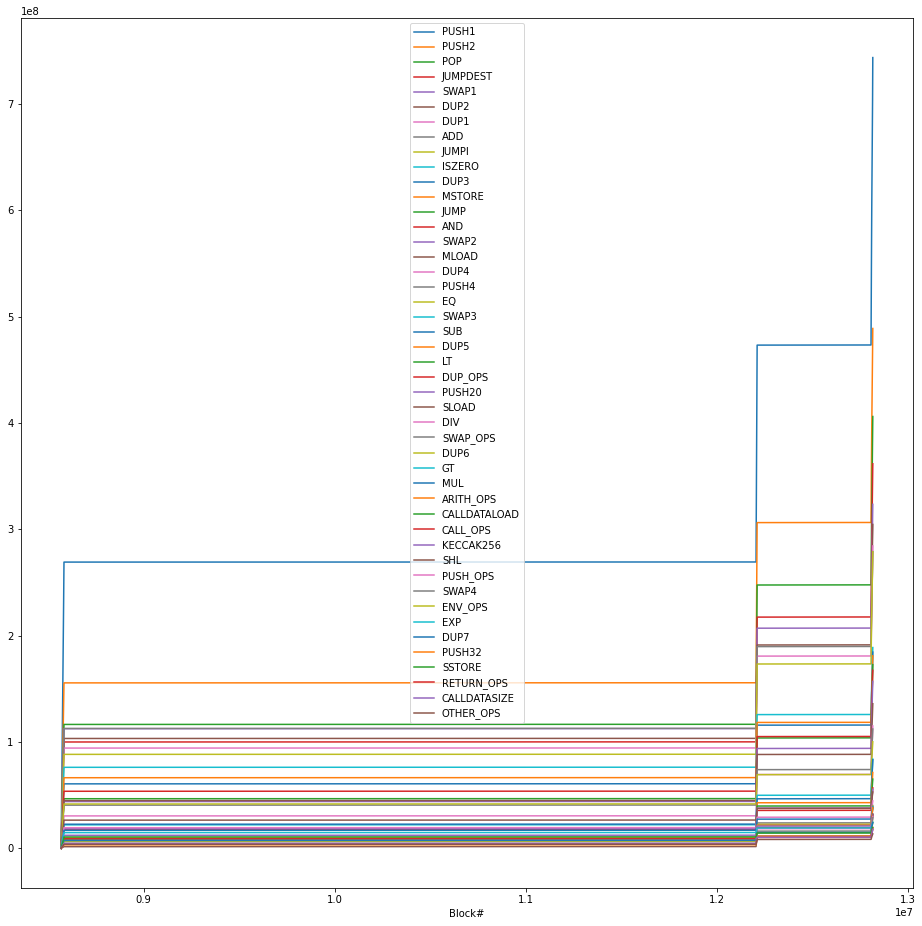

In [17]:
df.set_index('Block#')[ordered_condensed].cumsum().plot(figsize=(16,16));